# Special Topics in Computer Science - whateverthenumberthishomeworkis
## Time Series Analysis using ARIMA model - Apple stock prices
## Prapatsorn Boontam ID: 5988010 Section 2

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [9]:
df=pd.read_csv("AAPL.csv",parse_dates=["Date"],index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-29,84.820000,85.139999,84.215714,84.618568,74.826683,84344400
2014-04-30,84.662857,85.632858,84.257141,84.298569,74.543709,114160200
2014-05-01,84.571426,84.971428,83.765717,84.497147,74.719299,61012000
2014-05-02,84.620003,84.885712,84.244286,84.654289,74.858269,47878600
2014-05-05,84.305717,85.857140,84.285713,85.851425,75.916885,71766800


Use the date column as the index and parse its values as datetime as well

This is 5-years of data btw

In [11]:
dropcol = ['Open','High','Low','Volume']
df.drop(dropcol,axis=1,inplace=True)
df.head()

,Close,Adj Close
Date,,
2014-04-29,84.618568,74.826683
2014-04-30,84.298569,74.543709
2014-05-01,84.497147,74.719299
2014-05-02,84.654289,74.858269
2014-05-05,85.851425,75.916885


Drop the open, high, low and volume column because those didn't matter, the closing price did

In [12]:
adj_month = df.Close.resample('M').mean()
adj_month

Date
2014-04-30     84.458569
2014-05-31     86.170817
2014-06-30     91.885443
2014-07-31     95.625909
2014-08-31     98.436667
2014-09-30    100.548572
2014-10-31    101.699566
2014-11-30    113.285263
2014-12-31    112.411364
2015-01-31    110.641501
2015-02-28    125.432105
2015-03-31    125.970908
2015-04-30    127.291428
2015-05-31    128.761500
2015-06-30    127.806817
2015-07-31    125.335455
2015-08-31    113.394762
2015-09-30    112.797619
2015-10-31    113.360000
2015-11-30    118.162500
2015-12-31    111.726818
2016-01-31     98.428946
2016-02-29     95.746500
2016-03-31    104.267273
2016-04-30    106.739048
2016-05-31     94.974762
2016-06-30     96.622273
2016-07-31     98.556500
2016-08-31    107.665218
2016-09-30    110.857142
                 ...    
2016-11-30    110.154285
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.714209
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227726
2017-06-30    147.831362
2017-07-31    148.29

'Merge' the data into monthly using the end of the month

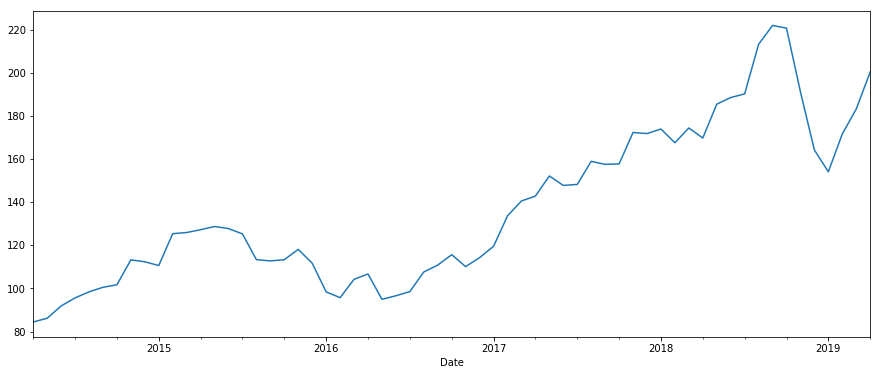

In [13]:
adj_month.plot(figsize=(15, 6))
plt.show()

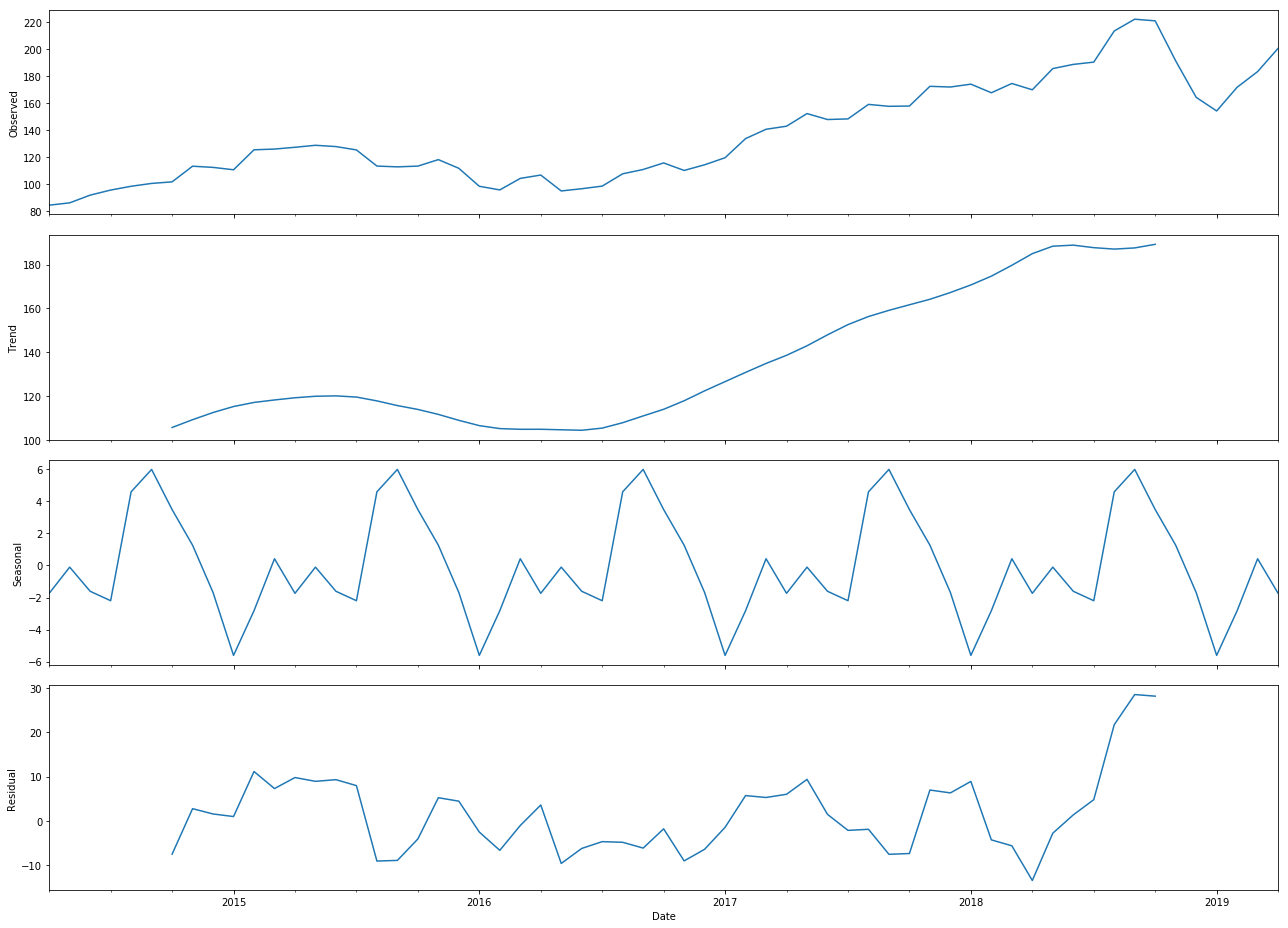

In [16]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13

decomposition = sm.tsa.seasonal_decompose(adj_month, model='additive')
fig = decomposition.plot()
plt.show()

Copied from the example notebook, it's extremely highly seasonal and the trend is continuously upwards as well. The residual looks risidual-ey, I guess. I don't see any particular pattern except the first quarter of 2018 which it dropped low and then shot back up. 

In [17]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Also copied from the example notebook, the chunk below will run through the parameters to find the best fit parameters.

In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(adj_month,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:767.3575528404798
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:585.3437961931438
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:480.10896102719425
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:367.77451506545475
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:473.77551317023506
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:449.2517891100093
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:377.36813740151575
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:364.15454399993115
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:681.3762002830238
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:516.88924646141
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:425.5730756478171
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:326.56320289165757
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:433.83792997196304
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:402.21177244777186
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:343.8473324540381
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:327.525195455498
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:435.3831894779245
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:355.08895452934763
ARIM

/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1341.1720077990626
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:361.0915652882686
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:356.6019368895008
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:280.98834099522065
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1320.2273000004473
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:423.78158200272554
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:343.8959351085639
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:368.56731727969714


/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1428.7044112169733
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:356.4894346771742
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:345.6199212334079
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:279.73055007947966


/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1406.1432352417642
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:441.9083727839023
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:362.01745134266173
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:384.2467644253272
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:286.18724770921085
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:361.09083577083186
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:363.08902059738193
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:282.8979157767667
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:284.49249026272435
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:431.38769009977295
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:351.3373559604192
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:375.178207656028
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:277.3381116831163
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:357.3173442336823
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:352.88920561305827
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:281.48843423473403
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:275.3251033820979
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:430.2250181252957
AR

/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1326.1670766337584
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:350.20948623768334
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:352.10233018980387
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:271.34619499805825


/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1304.2035539032145
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:425.26327378496205
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:345.3108134106485
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:370.097075012709
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1308.8317982882438
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:351.64909094156116
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:347.17078814562007
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:273.2864333955082
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1286.6779485719603


The result is ARIMA(1,1,0) with a seasonal order parameter of (1,1,0,12) got the lowest AIC value

In [20]:
mod = sm.tsa.statespace.SARIMAX(adj_month,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3135      0.157      1.996      0.046       0.006       0.621
ar.S.L12      -0.8023      0.116     -6.903      0.000      -1.030      -0.575
sigma2       114.8364     26.756      4.292      0.000      62.396     167.277


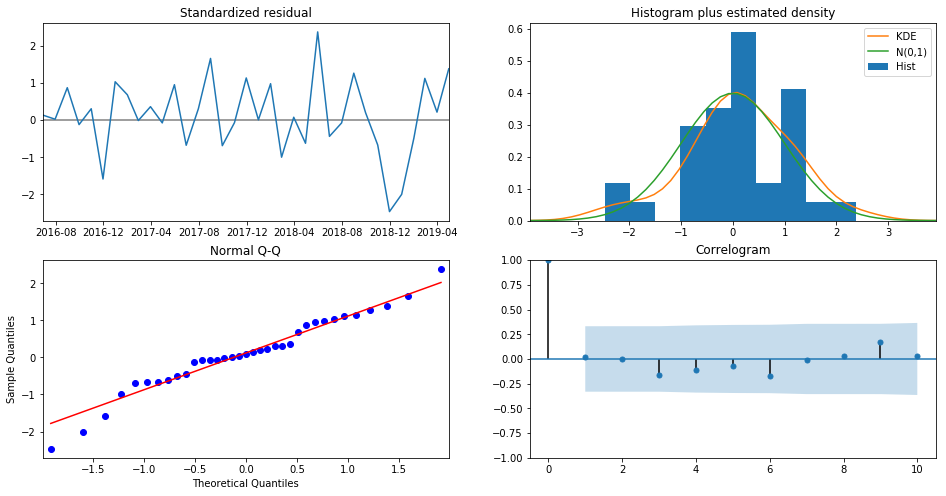

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Good results I guess?

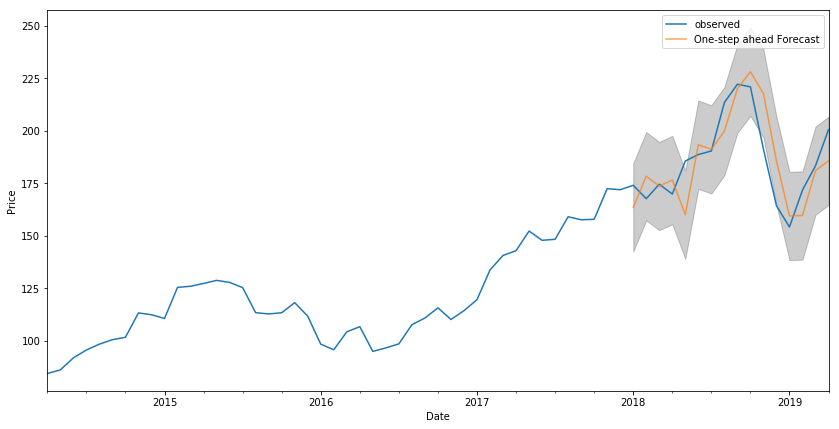

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = adj_month['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

It's pretty much in line with the real results......

/Users/prapatsornboontam/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


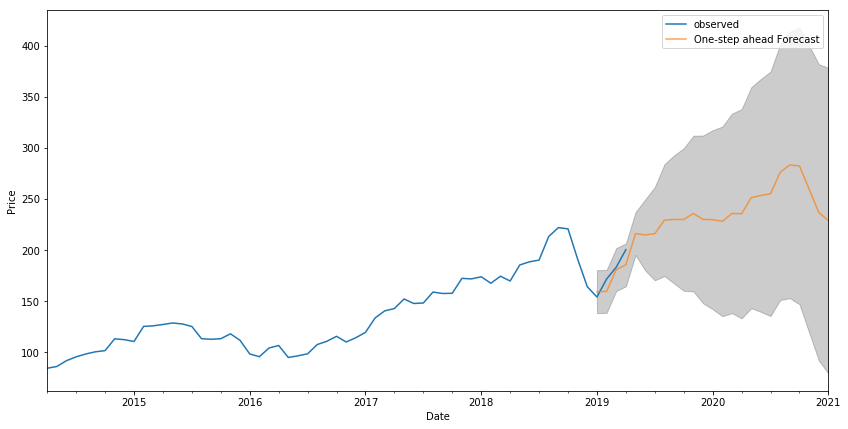

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-31'),end=pd.to_datetime('2021-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = adj_month['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

# Conclusion

The 'predictions' from the past (see above above graph) seems pretty accurate and the model suggests the price will keep increasing into the $300 mark which I don't think will happen due to stagnant phone business but maybe the services department will do an exceedingly good job, who knows.